<a href="https://colab.research.google.com/github/Saponjyan/CV/blob/main/stable_diffusion_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# %pip install --quiet --upgrade diffusers transformers accelerate mediapy triton scipy ftfy spacy==3.4.4
%pip install --quiet --upgrade diffusers transformers accelerate mediapy triton scipy ftfy spacy


In [14]:
# The xformers package is mandatory to be able to create several 768x768 images.
# %pip install -q xformers==0.0.16rc425
%pip install -q xformers

In [15]:
# model_id = "stabilityai/stable-diffusion-2-1-base"
# model_id = "stabilityai/stable-diffusion-2-1"
model_id = "dreamlike-art/dreamlike-photoreal-2.0"

In [16]:
from diffusers import PNDMScheduler, DDIMScheduler, LMSDiscreteScheduler, EulerDiscreteScheduler, DPMSolverMultistepScheduler

scheduler = None
# scheduler = PNDMScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = LMSDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")

In [17]:

import mediapy as media
import torch
from diffusers import StableDiffusionPipeline
import random

device = "cuda"

if model_id.startswith("stabilityai/"):
  model_revision = "fp16"
else:
  model_revision = None

if scheduler is None:
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      torch_dtype=torch.float16,
      revision=model_revision,
      )
else:
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      scheduler=scheduler,
      torch_dtype=torch.float16,
      revision=model_revision,
      )

pipe = pipe.to(device)
pipe.enable_xformers_memory_efficient_attention()

if model_id.endswith('-base'):
  image_length = 512
else:
  image_length = 768

  0%|          | 0/25 [00:00<?, ?it/s]


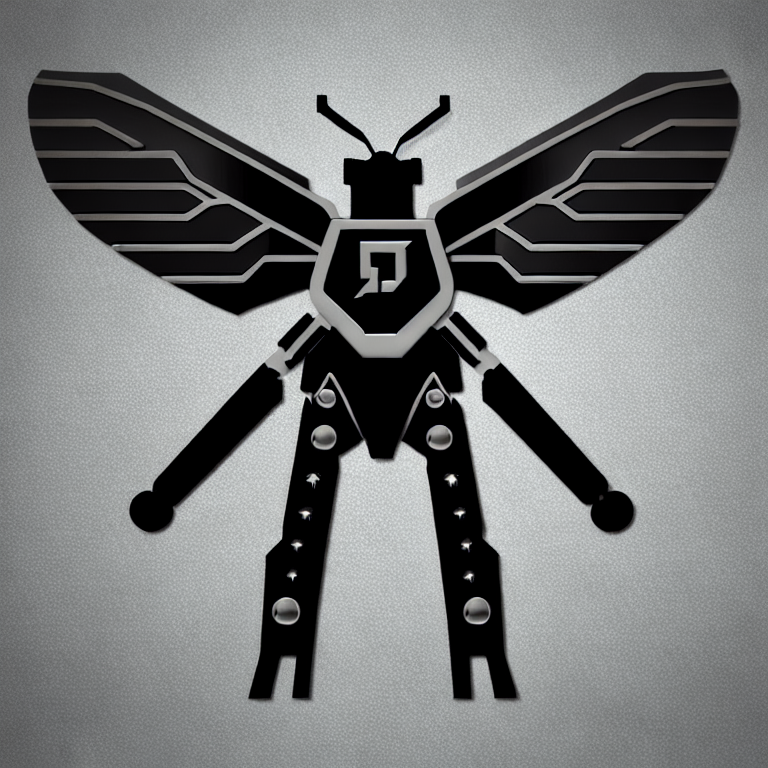
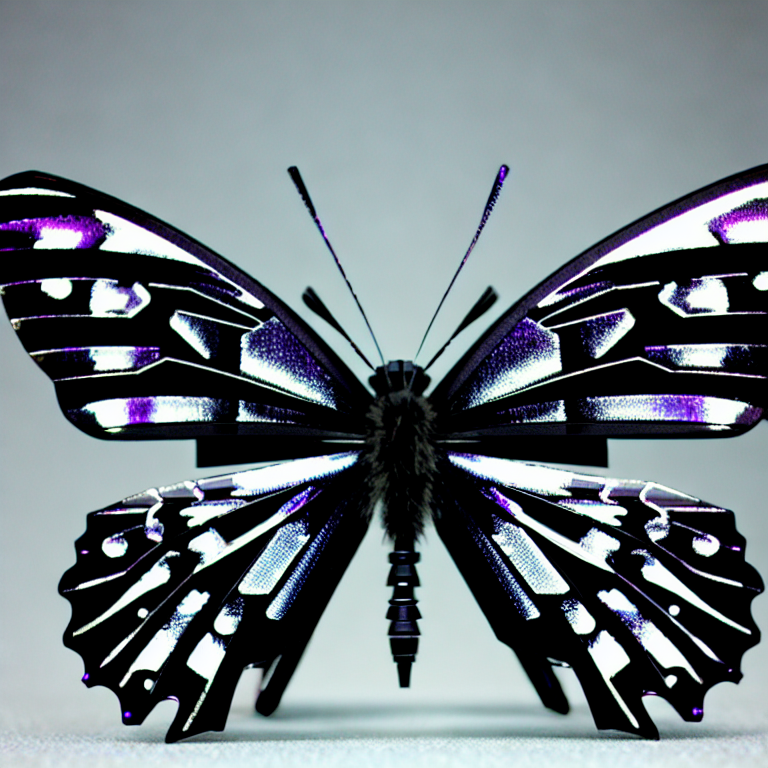
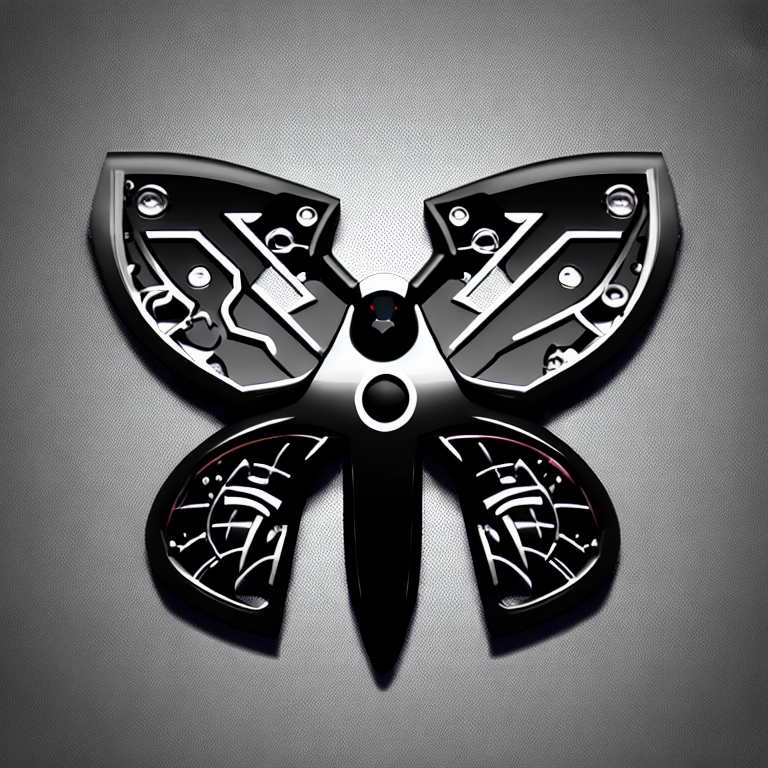
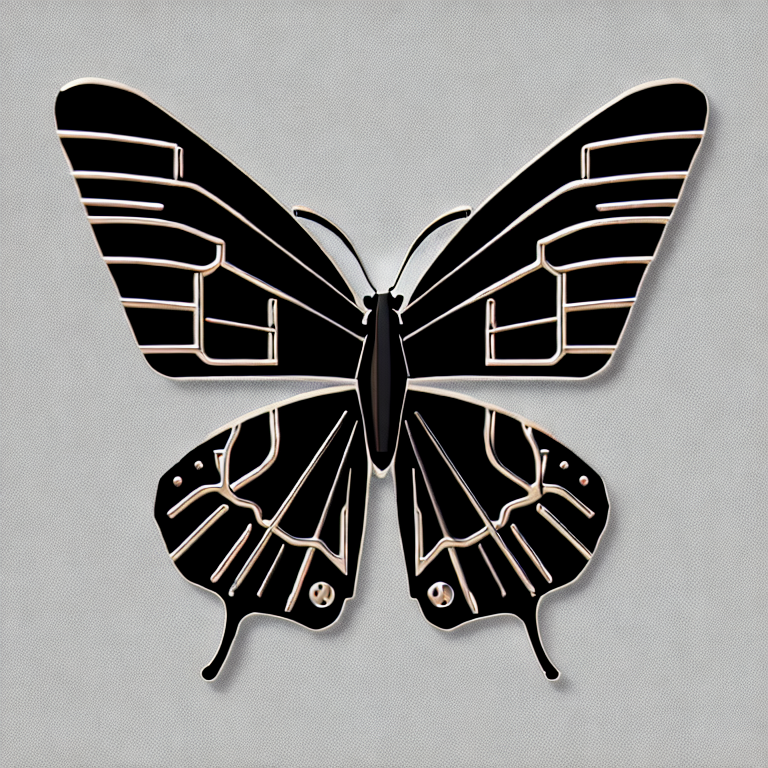

'Seed: 1230500856'

In [18]:
prompt = "black metalic buterfly for logo robotics company"
remove_safety = False
num_images = 4
seed = random.randint(0, 2147483647)

if remove_safety:
  negative_prompt = None
  pipe.safety_checker = None
else:
  negative_prompt = "nude, naked"

images = pipe(
    prompt,
    height = image_length,
    width = image_length,
    num_inference_steps = 25,
    guidance_scale = 9,
    num_images_per_prompt = num_images,
    negative_prompt = negative_prompt,
    generator = torch.Generator("cuda").manual_seed(seed)
    ).images

media.show_images(images)
display(f"Seed: {seed}")
# images[0].save("output.jpg")

  0%|          | 0/50 [00:00<?, ?it/s]


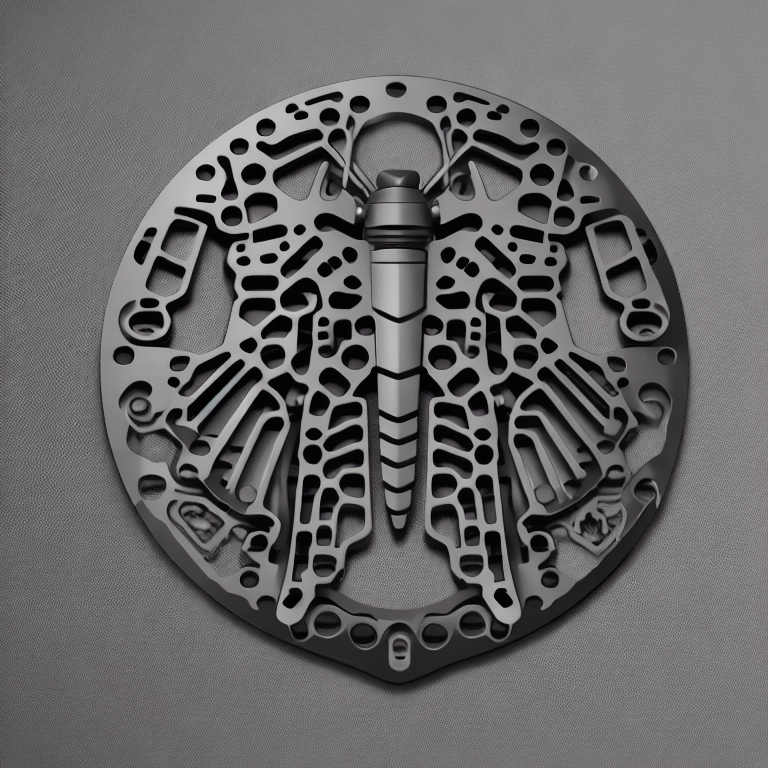

In [26]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "black metalic buterfly for logo robotics company"
# image = pipe(prompt).images[0]

media.show_images(pipe(prompt).images)
# image.save("./result.jpg")